In [217]:
# get the images to sample.
PATH_DATA = '/data/typhon2/Rhys/data/KiDS/ADP.2019-02-11T13:02:26.713.fits'
from DRUID import sf
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


(800, 800)


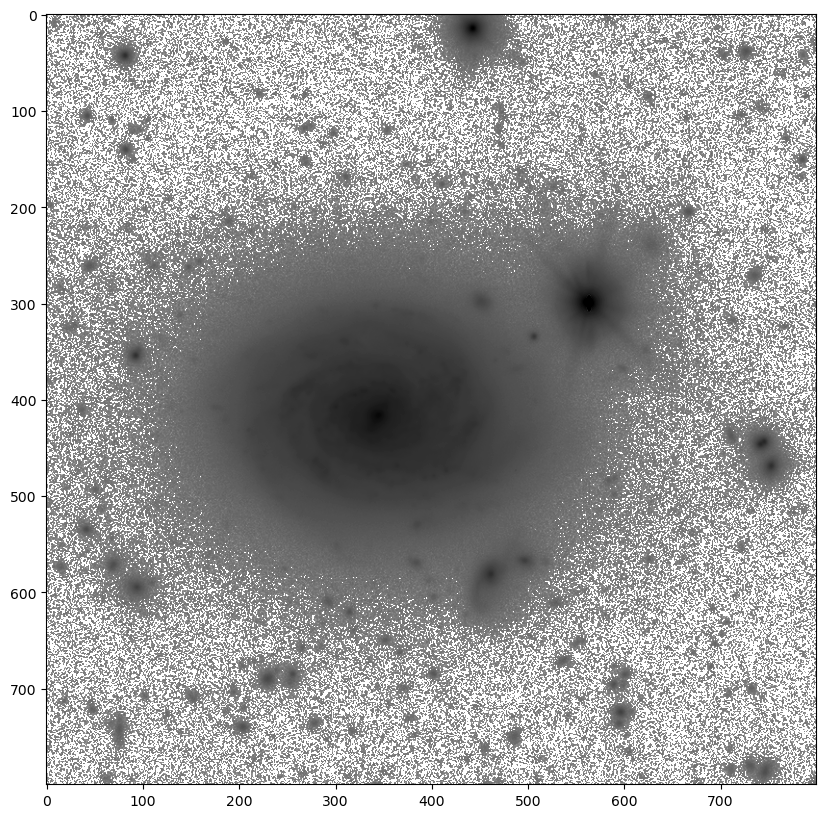

In [218]:
# object 1
image_1 = fits.open(PATH_DATA)[0].data
gal1xmin = 10000
gal1xmax = 10800
gal1ymin = 10800
gal1ymax = 11600

Gal1 = image_1[gal1ymin:gal1ymax, gal1xmin:gal1xmax]
print(Gal1.shape)
plt.figure(figsize=(10,10))
plt.imshow(Gal1, cmap='gray_r', norm=LogNorm(vmin=0, vmax=1E-8))
plt.show()

(700, 700)


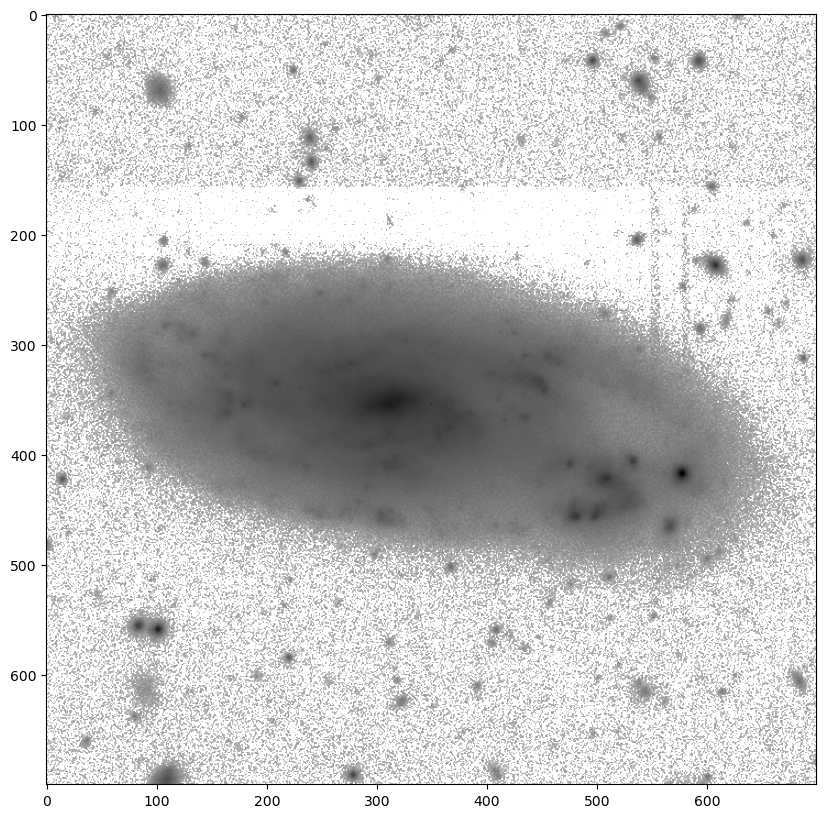

In [219]:
# object 2

center = (15074.542, 14138.845)
size = 350
xmin = int(center[0]-size)
xmax = int(center[0]+size)
ymin = int(center[1]-size)
ymax = int(center[1]+size)

Gal2 = image_1[ymin:ymax, xmin:xmax]
print(Gal2.shape)
plt.figure(figsize=(10,10))
plt.imshow(Gal2, cmap='gray_r', norm=LogNorm(vmin=1E-13, vmax=1E-9))
plt.show()




(600, 600)


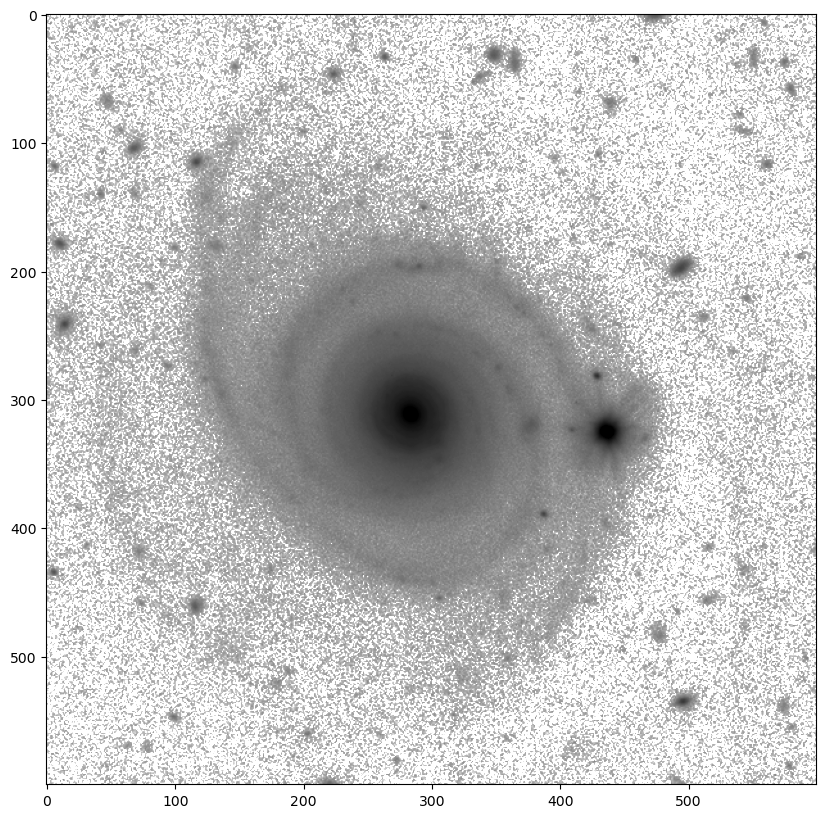

In [220]:
# more galaxies from other images
PATH__image_2 = '/data/typhon2/Rhys/data/KiDS/ADP.2019-02-11T13:02:26.701.fits'
# open this image
image_2 = fits.open(PATH__image_2)[0].data

# object 3
center = (11468.706, 3351.798)
size = 300
xmin = int(center[0]-size)
xmax = int(center[0]+size)
ymin = int(center[1]-size)
ymax = int(center[1]+size)

Gal3 = image_2[ymin:ymax, xmin:xmax]
print(Gal3.shape)
plt.figure(figsize=(10,10))
plt.imshow(Gal3, cmap='gray_r', norm=LogNorm(vmin=1E-13, vmax=1E-9))
plt.show()


(200, 200)


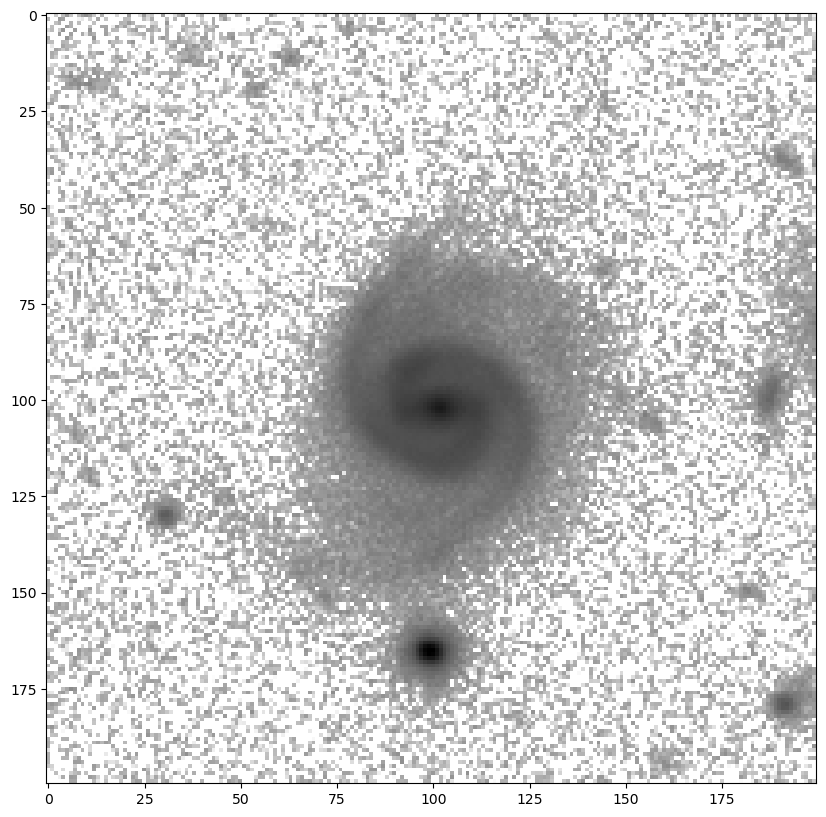

In [221]:
center = (11864.804, 12445.880)
size = 100
xmin = int(center[0]-size)
xmax = int(center[0]+size)
ymin = int(center[1]-size)
ymax = int(center[1]+size)

Gal4 = image_2[ymin:ymax, xmin:xmax]
print(Gal4.shape)
plt.figure(figsize=(10,10))
plt.imshow(Gal4, cmap='gray_r', norm=LogNorm(vmin=1E-13, vmax=1E-9))
plt.show()


(200, 200)


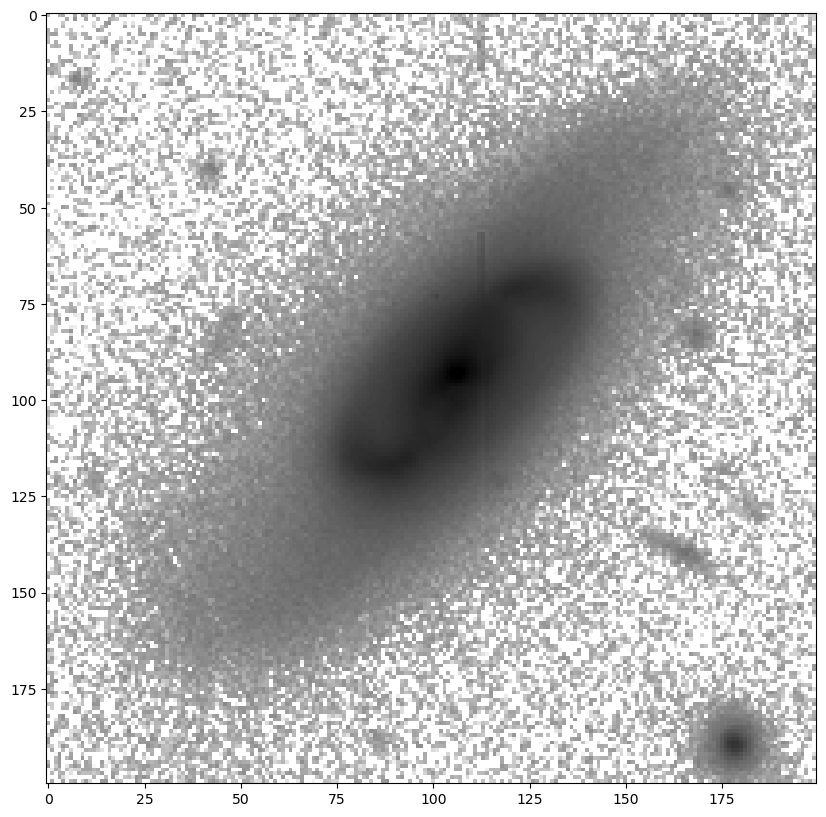

In [222]:
center = (1835.245, 14866.472)
size = 100
xmin = int(center[0]-size)
xmax = int(center[0]+size)
ymin = int(center[1]-size)
ymax = int(center[1]+size)

Gal5 = image_2[ymin:ymax, xmin:xmax]

print(Gal5.shape)
plt.figure(figsize=(10,10))
plt.imshow(Gal5, cmap='gray_r', norm=LogNorm(vmin=1E-13, vmax=1E-9))
plt.show()


In [223]:
# preform DRUID on these images
from DRUID import sf
# we dont really care what the header is, just need it to be there.

header = fits.open(PATH_DATA)[0].header

def DRUID_CODE(image,lifetime_limit_fraction,lifetime_limit,area_limit):

    findmysources = sf(image=image,image_path=None,mode='optical',
                       pb_path=None,cutup=False,output=False,area_limit=area_limit,smooth_sigma=1,
                       nproc=1,GPU=True,header=header)
    
    findmysources.set_background(detection_threshold=1.5,
                                 analysis_threshold=1.5,
                                 mode='mad_std')
    #print(findmysources.local_bg)
    if lifetime_limit is None:
        lifetime_limit = findmysources.local_bg/1.5
    #findmysources.local_bg = 1E-13
    findmysources.phsf(lifetime_limit_fraction=lifetime_limit_fraction,
                       lifetime_limit=lifetime_limit)
    
    findmysources.source_characterising(use_gpu=True)
    
    return findmysources

Gal1_DRUID = DRUID_CODE(Gal1,1,None,5)
Gal2_DRUID = DRUID_CODE(Gal2,1,None,5)
Gal3_DRUID = DRUID_CODE(Gal3,1,None,5)
Gal4_DRUID = DRUID_CODE(Gal4,1,None,5)
Gal5_DRUID = DRUID_CODE(Gal5,1,None,5)


   
              
              
#############################################

_______   _______          _________ ______  
(  __  \ (  ____ )|\     /|\__   __/(  __  \ 
| (  \  )| (    )|| )   ( |   ) (   | (  \  )
| |   ) || (____)|| |   | |   | |   | |   ) |
| |   | ||     __)| |   | |   | |   | |   | |
| |   ) || (\ (   | |   | |   | |   | |   ) |
| (__/  )| ) \ \__| (___) |___) (___| (__/  )
(______/ |/   \__/(_______)\_______/(______/ 
        
        
#############################################

Detector of astRonomical soUrces in optIcal and raDio images

Version: v1.0

For more information see:
https://github.com/RhysAlfShaw/DRUID
        
Found 1 GPUs
GPUs are avalible, GPU functions will now be avalible.
Image smoothed with sigma = 1
Setting background..
Not creating a background map.


Background set to:  1.3180403259164916e-12
Background mean set to:  6.6850236e-13
Time to compute PH: 0.233597993850708
Calculating area with GPU...
Time to calculate area and inital bbox: 0.4571356773376465
enclosed_i calculated! t=0.6394119262695312 s
255
Time to correct first destruction:  0.07185149192810059
Assigning parent tags..
Time to assign parent tags:  0.0031354427337646484
Classifying sources in hirearchy..
Time to classify sources:  0.0053293704986572266
            Birth         Death     x1     y1     x2     y2      lifetime  \
0    2.259730e-08  1.977060e-12  299.0  564.0    0.0    0.0  2.259532e-08   
1    5.350015e-09  9.643725e-12  416.0  345.0  335.0  518.0  5.340371e-09   
2    4.944733e-10  1.977060e-12  444.0  745.0  510.0  649.0  4.924962e-10   
3    3.202187e-10  8.180654e-12  581.0  462.0  535.0  481.0  3.120380e-10   
4    2.714379e-10  1.307068e-11  469.0  753.0  459.0  746.0  2.583672e-10   
..            ...           ...    ...    ...    ...    ...      

/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd = pd.append(new_row,ignore_index=True)
/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  pd = pd.append(new_row,ignore_index=True)
/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd = pd.append(new_row,ignore_index=True)
/home/rs17612/GitHub/DRUID/DRUID/src/utils/utils.py:356: RuntimeWarning: divide by zero encountered in scalar divide
  correction_factor = model_beam_flux/masked_beam_flux


Converting Xc and Yc to RA and DEC
   
              
              
#############################################

_______   _______          _________ ______  
(  __  \ (  ____ )|\     /|\__   __/(  __  \ 
| (  \  )| (    )|| )   ( |   ) (   | (  \  )
| |   ) || (____)|| |   | |   | |   | |   ) |
| |   | ||     __)| |   | |   | |   | |   | |
| |   ) || (\ (   | |   | |   | |   | |   ) |
| (__/  )| ) \ \__| (___) |___) (___| (__/  )
(______/ |/   \__/(_______)\_______/(______/ 
        
        
#############################################

Detector of astRonomical soUrces in optIcal and raDio images

Version: v1.0

For more information see:
https://github.com/RhysAlfShaw/DRUID
        
Found 1 GPUs
GPUs are avalible, GPU functions will now be avalible.
Image smoothed with sigma = 1
Setting background..
Not creating a background map.
Background set to:  1.3647872689058968e-12
Background mean set to:  2.5480993e-13
Time to compute PH: 0.17667317390441895


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Calculating area with GPU...
Time to calculate area and inital bbox: 0.4307100772857666
enclosed_i calculated! t=0.586200475692749 s
216
Time to correct first destruction:  0.08001351356506348
Assigning parent tags..
Time to assign parent tags:  0.0028688907623291016
Classifying sources in hirearchy..
Time to classify sources:  0.0047338008880615234
            Birth         Death     x1     y1     x2     y2      lifetime  \
0    9.864415e-10  2.047181e-12  417.0  578.0    0.0    0.0  9.843943e-10   
1    3.656984e-10  1.645428e-11  354.0  312.0  416.0  556.0  3.492441e-10   
2    2.496351e-10  2.047181e-12  559.0  101.0  549.0  374.0  2.475879e-10   
3    1.313923e-10  2.047181e-12  228.0  608.0  275.0  578.0  1.293451e-10   
4    1.481578e-10  2.822135e-11  422.0  509.0  393.0  450.0  1.199365e-10   
..            ...           ...    ...    ...    ...    ...           ...   
236  3.458511e-11  3.107047e-11  385.0  177.0  373.0  191.0  4.893728e-12   
237  9.299907e-11  9.087527e-11 

/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd = pd.append(new_row,ignore_index=True)
/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  pd = pd.append(new_row,ignore_index=True)
/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd = pd.append(new_row,ignore_index=True)
/home/rs17612/GitHub/DRUID/DRUID/src/utils/utils.py:356: RuntimeWarning: invalid value encountered in scalar divide
  correction_factor = model_beam_flux/masked_beam_flux


Converting Xc and Yc to RA and DEC
   
              
              
#############################################

_______   _______          _________ ______  
(  __  \ (  ____ )|\     /|\__   __/(  __  \ 
| (  \  )| (    )|| )   ( |   ) (   | (  \  )
| |   ) || (____)|| |   | |   | |   | |   ) |
| |   | ||     __)| |   | |   | |   | |   | |
| |   ) || (\ (   | |   | |   | |   | |   ) |
| (__/  )| ) \ \__| (___) |___) (___| (__/  )
(______/ |/   \__/(_______)\_______/(______/ 
        
        
#############################################

Detector of astRonomical soUrces in optIcal and raDio images

Version: v1.0

For more information see:
https://github.com/RhysAlfShaw/DRUID
        
Found 1 GPUs
GPUs are avalible, GPU functions will now be avalible.
Image smoothed with sigma = 1
Setting background..
Not creating a background map.
Background set to:  1.4878812080793083e-12
Background mean set to:  6.844194e-13
Time to compute PH: 0.12620139122009277


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Calculating area with GPU...
Time to calculate area and inital bbox: 0.27281689643859863
enclosed_i calculated! t=0.5008692741394043 s
200
Time to correct first destruction:  0.05625772476196289
Assigning parent tags..
Time to assign parent tags:  0.0027725696563720703
Classifying sources in hirearchy..
Time to classify sources:  0.004509687423706055
            Birth         Death     x1     y1     x2     y2      lifetime  \
0    1.943265e-08  2.231822e-12  325.0  437.0    0.0    0.0  1.943042e-08   
1    2.693196e-09  8.438794e-12  311.0  284.0  321.0  398.0  2.684758e-09   
2    1.130916e-10  8.747214e-12  281.0  429.0  288.0  431.0  1.043444e-10   
3    1.007559e-10  2.231822e-12  535.0  496.0  548.0  529.0  9.852410e-11   
4    7.345461e-11  2.231822e-12  197.0  494.0  237.0  459.0  7.122279e-11   
..            ...           ...    ...    ...    ...    ...           ...   
211  1.756935e-11  1.441376e-11  299.0  190.0  329.0  199.0  4.016900e-12   
212  6.342053e-12  3.658408e-12

/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd = pd.append(new_row,ignore_index=True)
/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  pd = pd.append(new_row,ignore_index=True)
/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd = pd.append(new_row,ignore_index=True)


Converting Xc and Yc to RA and DEC
   
              
              
#############################################

_______   _______          _________ ______  
(  __  \ (  ____ )|\     /|\__   __/(  __  \ 
| (  \  )| (    )|| )   ( |   ) (   | (  \  )
| |   ) || (____)|| |   | |   | |   | |   ) |
| |   | ||     __)| |   | |   | |   | |   | |
| |   ) || (\ (   | |   | |   | |   | |   ) |
| (__/  )| ) \ \__| (___) |___) (___| (__/  )
(______/ |/   \__/(_______)\_______/(______/ 
        
        
#############################################

Detector of astRonomical soUrces in optIcal and raDio images

Version: v1.0

For more information see:
https://github.com/RhysAlfShaw/DRUID
        
Found 1 GPUs
GPUs are avalible, GPU functions will now be avalible.
Image smoothed with sigma = 1
Setting background..
Not creating a background map.
Background set to:  1.0982515240325232e-12
Background mean set to:  2.752499e-13
Time to compute PH: 0.011387348175048828
Calculating area with GPU...
T

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd = pd.append(new_row,ignore_index=True)
/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  pd = pd.append(new_row,ignore_index=True)
/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd = pd.append(new_row,ignore_index=True)


Converting Xc and Yc to RA and DEC
   
              
              
#############################################

_______   _______          _________ ______  
(  __  \ (  ____ )|\     /|\__   __/(  __  \ 
| (  \  )| (    )|| )   ( |   ) (   | (  \  )
| |   ) || (____)|| |   | |   | |   | |   ) |
| |   | ||     __)| |   | |   | |   | |   | |
| |   ) || (\ (   | |   | |   | |   | |   ) |
| (__/  )| ) \ \__| (___) |___) (___| (__/  )
(______/ |/   \__/(_______)\_______/(______/ 
        
        
#############################################

Detector of astRonomical soUrces in optIcal and raDio images

Version: v1.0

For more information see:
https://github.com/RhysAlfShaw/DRUID
        
Found 1 GPUs
GPUs are avalible, GPU functions will now be avalible.
Image smoothed with sigma = 1
Setting background..
Not creating a background map.
Background set to:  2.341003433736732e-12
Background mean set to:  1.4187433e-12
Time to compute PH: 0.011126279830932617
Calculating area with GPU...
T

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd = pd.append(new_row,ignore_index=True)
/home/rs17612/GitHub/DRUID/DRUID/src/homology/homology_new.py:212: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  pd = pd.append(new_row,ignore_index=True)
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [224]:
vmmin = 0
vmax = 3E-10

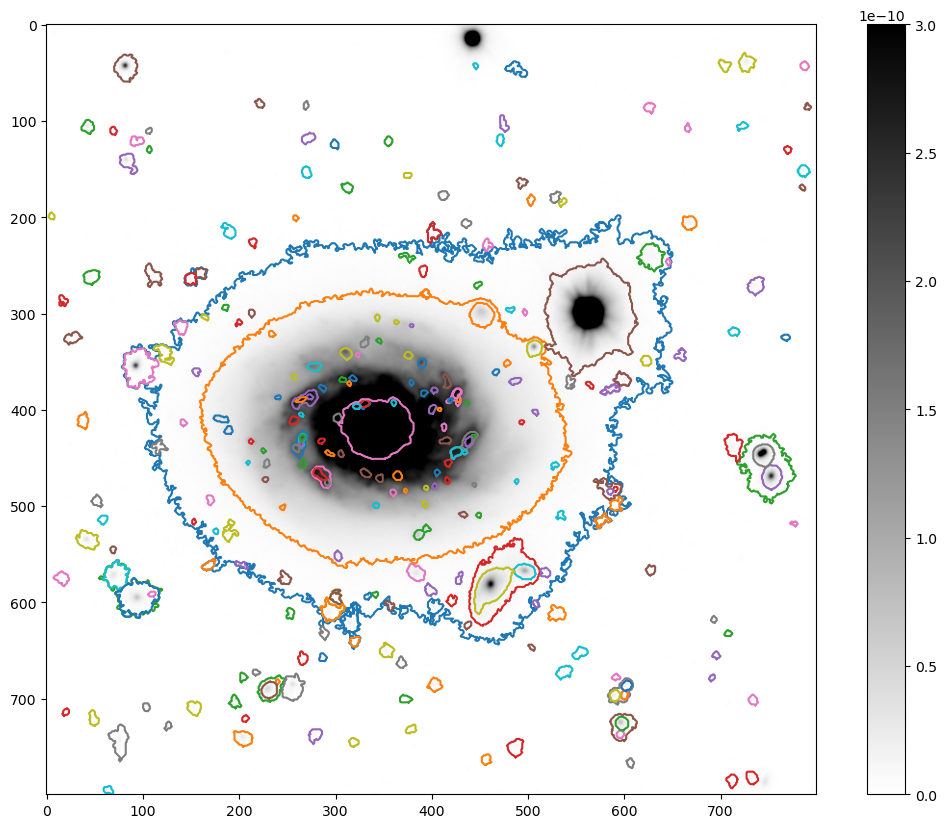

In [225]:
# Plot the sF results.
plt.figure(figsize=(13,10))
plt.imshow(Gal1_DRUID.image, cmap='gray_r', vmin=vmmin, vmax=vmax)
# plot the polygons
for i in range(len(Gal1_DRUID.catalogue)):
    plt.plot(Gal1_DRUID.catalogue.iloc[i].contour[:,1], Gal1_DRUID.catalogue.iloc[i].contour[:,0])
plt.colorbar()
plt.show()

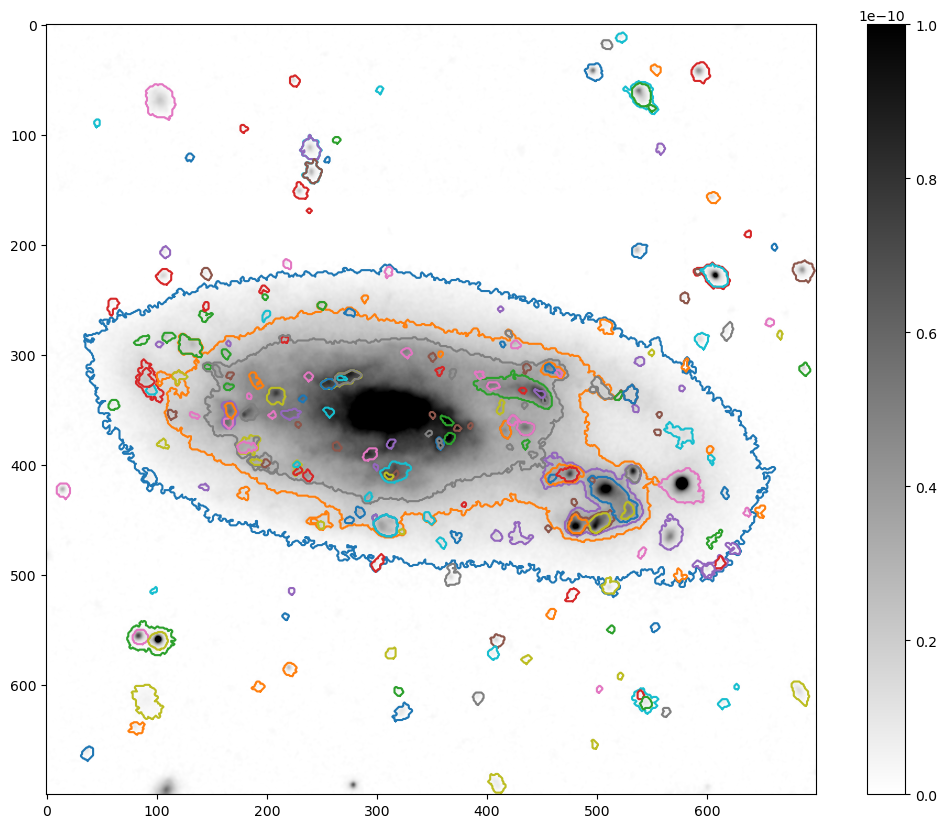

In [226]:
plt.figure(figsize=(13,10))
plt.imshow(Gal2_DRUID.image, cmap='gray_r', vmin=vmmin, vmax=1e-10)
# plot the polygons
for i in range(len(Gal2_DRUID.catalogue)):
    plt.plot(Gal2_DRUID.catalogue.iloc[i].contour[:,1], Gal2_DRUID.catalogue.iloc[i].contour[:,0])
plt.colorbar()
plt.show()

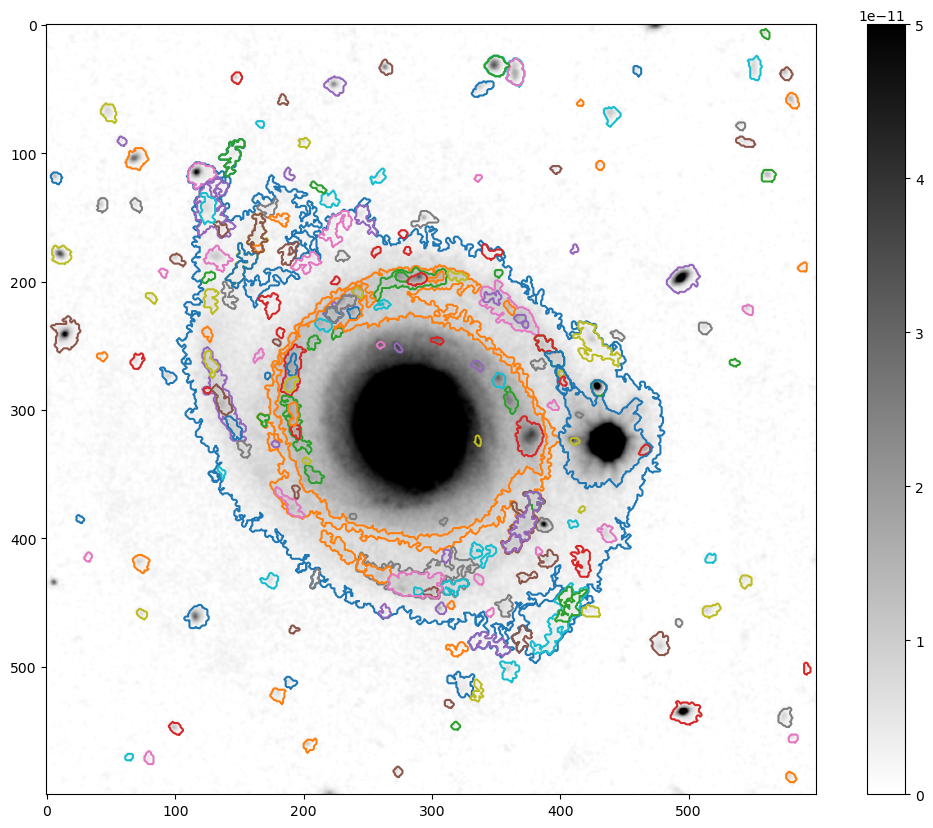

In [227]:
plt.figure(figsize=(13,10))
plt.imshow(Gal3_DRUID.image, cmap='gray_r', vmin=vmmin, vmax=5e-11)
# plot the polygons
for i in range(len(Gal3_DRUID.catalogue)):
    plt.plot(Gal3_DRUID.catalogue.iloc[i].contour[:,1], Gal3_DRUID.catalogue.iloc[i].contour[:,0])
    
plt.colorbar()
plt.show()


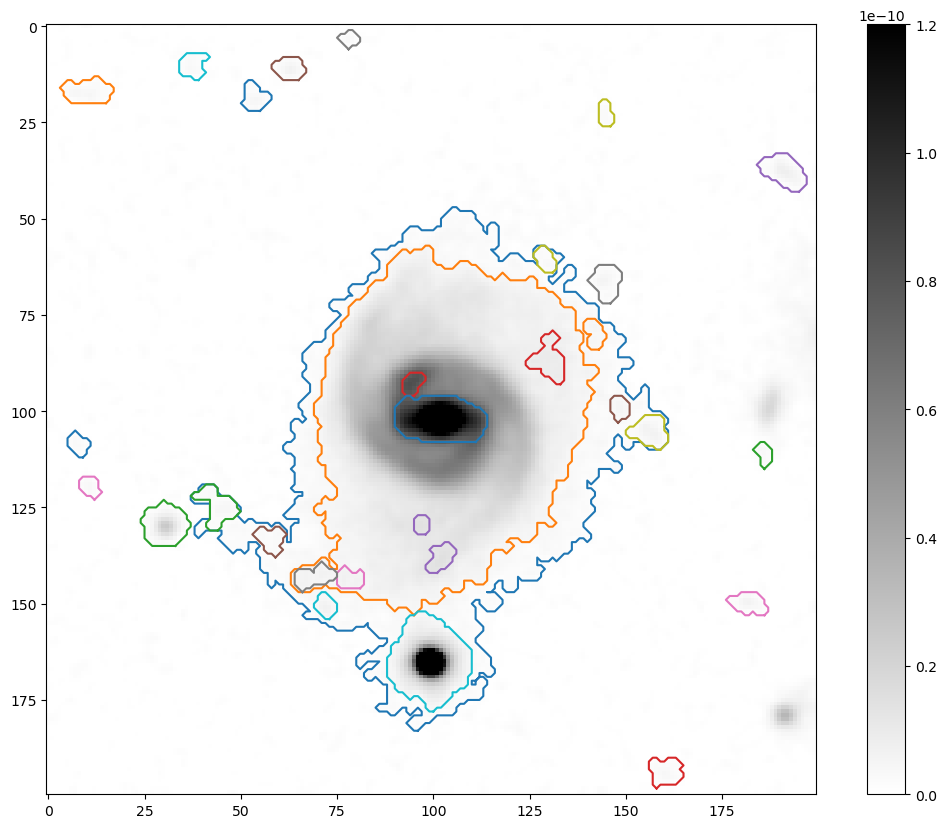

In [246]:
plt.figure(figsize=(13,10))
plt.imshow(Gal4_DRUID.image, cmap='gray_r', vmin=vmmin, vmax=12e-11)
# plot the polygons
for i in range(len(Gal4_DRUID.catalogue)):
    plt.plot(Gal4_DRUID.catalogue.iloc[i].contour[:,1]-1, Gal4_DRUID.catalogue.iloc[i].contour[:,0]-1)
plt.colorbar()
plt.show()


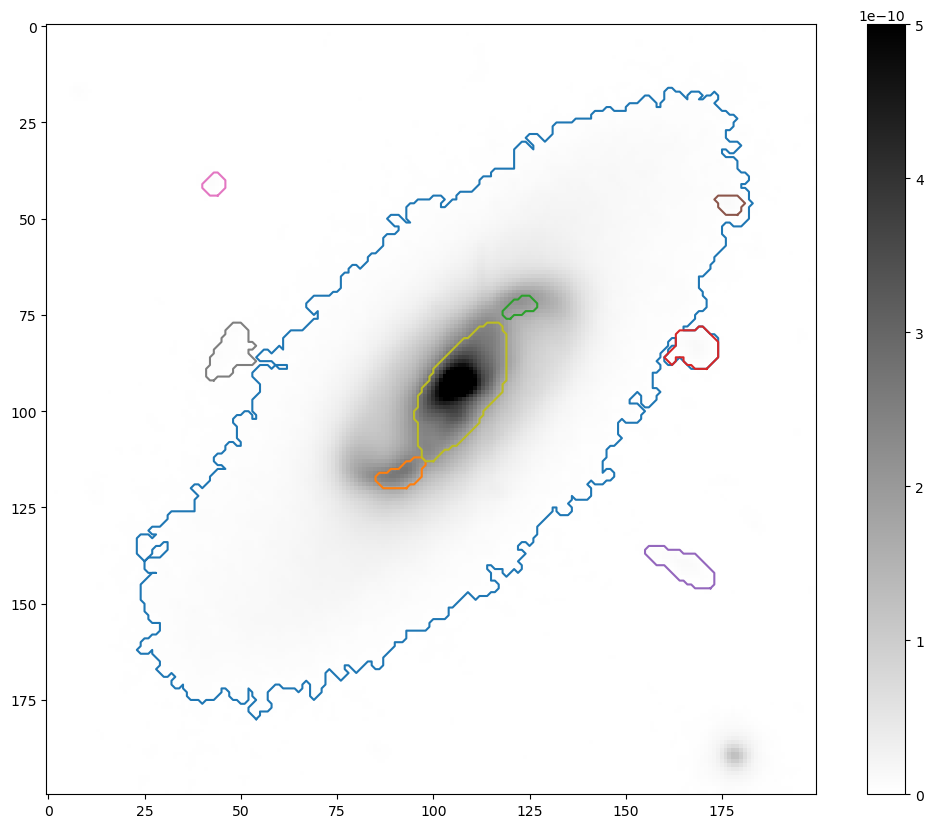

In [229]:
plt.figure(figsize=(13,10))
plt.imshow(Gal5_DRUID.image, cmap='gray_r', vmin=vmmin, vmax=5e-10)
# plot the polygons
for i in range(len(Gal5_DRUID.catalogue)):
    plt.plot(Gal5_DRUID.catalogue.iloc[i].contour[:,1], Gal5_DRUID.catalogue.iloc[i].contour[:,0])
plt.colorbar()
plt.show()

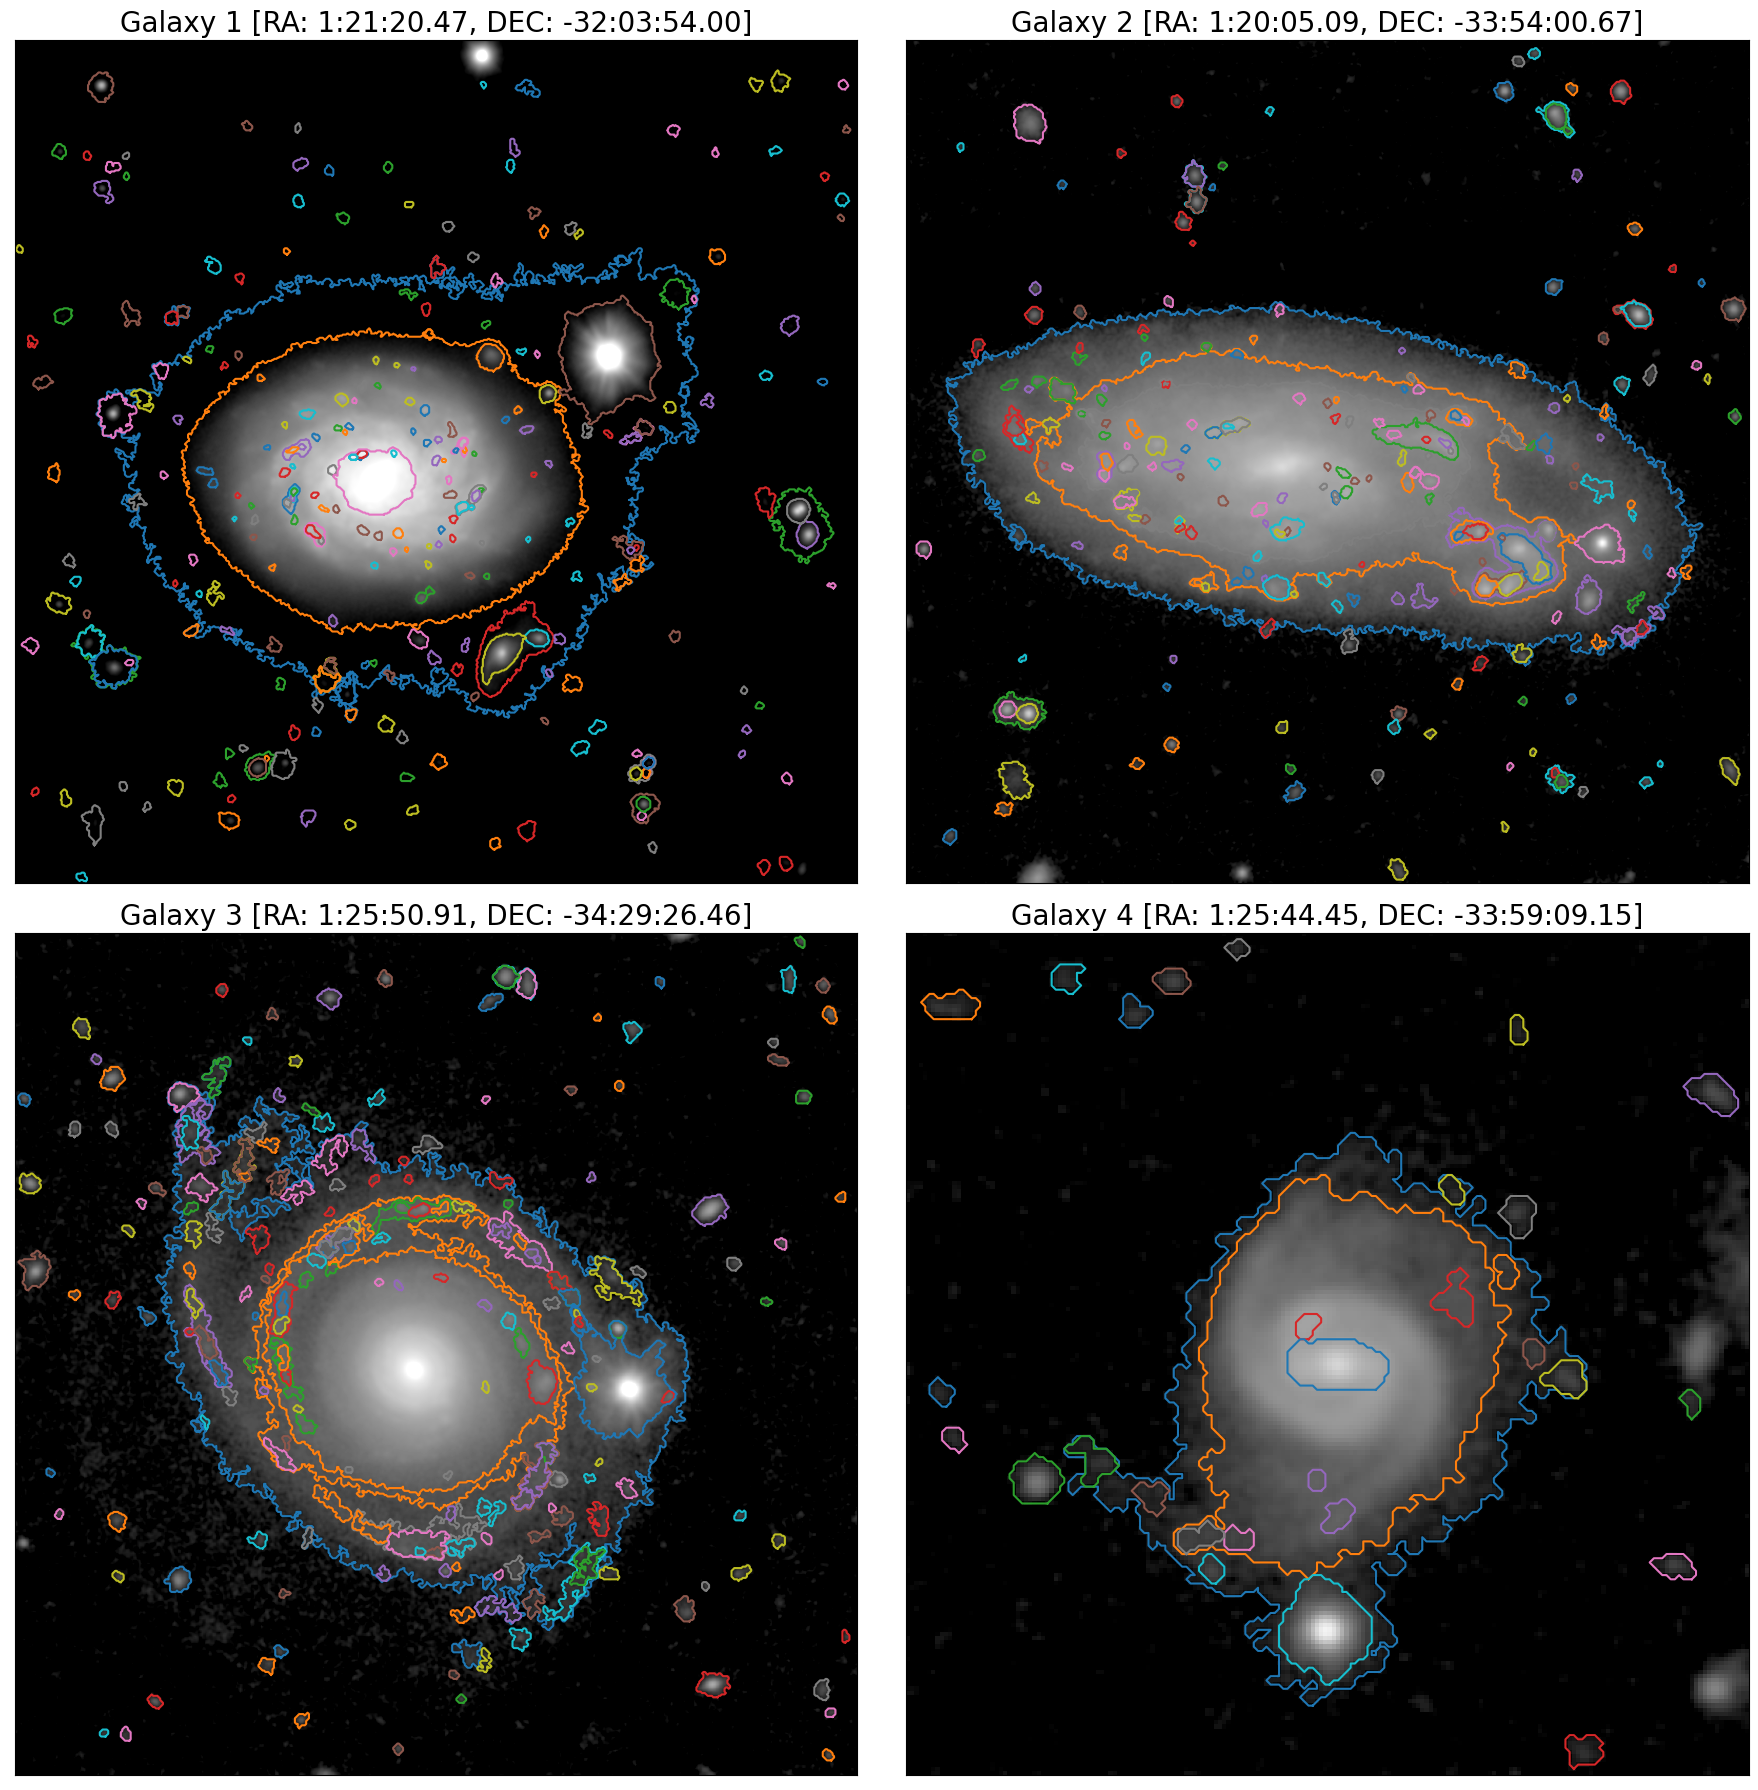

In [255]:
# create a combined plot for the first 4 galaxies
vmin = 1E-11
font_size = 20
fig, axs = plt.subplots(2, 2, figsize=(18,18))
im_1 = axs[0,0].imshow(Gal1_DRUID.image, cmap='gray', norm = LogNorm(vmin=vmin, vmax=1E-9,clip=True))
axs[0,0].set_title('Galaxy 1 [RA: 1:21:20.47, DEC: -32:03:54.00]', fontsize=font_size)
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
# plot the polygons
for i in range(len(Gal1_DRUID.catalogue)):
    axs[0,0].plot(Gal1_DRUID.catalogue.iloc[i].contour[:,1]-1, Gal1_DRUID.catalogue.iloc[i].contour[:,0]-1)
# add colorbar

im_2 = axs[0,1].imshow(Gal2_DRUID.image, cmap='gray', norm = LogNorm(vmin=1E-12, vmax=1E-9,clip=True))
axs[0,1].set_title('Galaxy 2 [RA: 1:20:05.09, DEC: -33:54:00.67]', fontsize=font_size)
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

# plot the polygons
for i in range(len(Gal2_DRUID.catalogue)):
    axs[0,1].plot(Gal2_DRUID.catalogue.iloc[i].contour[:,1]-1, Gal2_DRUID.catalogue.iloc[i].contour[:,0]-1)

im_3 = axs[1,0].imshow(Gal3_DRUID.image, cmap='gray', norm = LogNorm(vmin=1E-12, vmax=1E-9,clip=True))
axs[1,0].set_title('Galaxy 3 [RA: 1:25:50.91, DEC: -34:29:26.46]', fontsize=font_size)
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
# plot the polygons

for i in range(len(Gal3_DRUID.catalogue)):
    axs[1,0].plot(Gal3_DRUID.catalogue.iloc[i].contour[:,1]-1, Gal3_DRUID.catalogue.iloc[i].contour[:,0]-1)

im_4 = axs[1,1].imshow(Gal4_DRUID.image, cmap='gray', norm = LogNorm(vmin=1E-12, vmax=1E-9,clip=True))
axs[1,1].set_title('Galaxy 4 [RA: 1:25:44.45, DEC: -33:59:09.15]', fontsize=font_size)
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
# plot the polygons
for i in range(len(Gal4_DRUID.catalogue)):
    axs[1,1].plot(Gal4_DRUID.catalogue.iloc[i].contour[:,1]-1, Gal4_DRUID.catalogue.iloc[i].contour[:,0]-1)

# fig.colorbar(im_1, ax=axs[0,0],label='Flux (ADU)')
# fig.colorbar(im_2, ax=axs[0,1],label='Flux (ADU)')
# fig.colorbar(im_3, ax=axs[1,0],label='Flux (ADU)')
# fig.colorbar(im_4, ax=axs[1,1],label='Flux (ADU)')
plt.tight_layout()
plt.savefig('figures/DRUID_KIDS_GALAXIES.svg')
plt.show()